In [1]:
!ls

2015pcard_data (1).csv                techtrades_2016_data_input_CC (1).csv
2016pcard_data (1).csv                techtrades_accounts (1).csv
2017pcard_data (1).csv                techtrades_bu (1).csv
Suplari_data_exercise.ipynb


# Data preparation & cleaning

In this data exercise, I will be using pandas to clean up the data and finally use seaborn and matplot to make visualizations.

In [2]:
# import necessary libralies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# import data that stored in local folder
pcard2015_df = pd.read_csv('2015pcard_data (1).csv')
pcard2016_df = pd.read_csv('2016pcard_data (1).csv')
pcard2017_df = pd.read_csv('2017pcard_data (1).csv')

techtrades2016_df = pd.read_csv('techtrades_2016_data_input_CC (1).csv')
techtrades_accounts_df = pd.read_csv('techtrades_accounts (1).csv')
techtrades_bu_df = pd.read_csv('techtrades_bu (1).csv')

In [4]:
pcard2015_df.head()

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,expensetype,costcenter
0,15pcd112,8.960,2/13/2015,76,940001,100,8740,Building Suppliles,Corporate IT
1,15pcd110,-3.688,2/21/2015,76,940001,100,8740,Building Suppliles,Corporate IT
2,15pcd113,24.008,12/2/2015,76,940001,100,8740,Building Suppliles,Corporate IT
3,15pcd31,20.000,2/13/2015,76,940001,100,8416,Car Rental,Corporate IT
4,15pcd32,15.952,2/21/2015,76,940001,100,8416,Car Rental,Corporate IT


In [5]:
pcard2017_df.describe()

,amount,merchantcode,bu,account
count,189858.000000,189858.000000,189858.000000,189858.000000
mean,254.479514,36144.095424,107.864825,8305.946002
std,4622.354189,12638.152236,21.143068,577.806168
min,-20147.987750,15100.000000,100.000000,1500.000000
25%,8.281412,24572.000000,100.000000,8418.000000
50%,28.325358,36991.000000,100.000000,8425.000000
75%,107.984436,48056.000000,110.000000,8590.000000
max,765407.166000,54428.000000,200.000000,8740.000000


In [6]:
techtrades2016_df.head()

,id,name,costcenter
0,1,Operations,Operations
1,2,Facilities,Facilities
2,3,Sales,Sales
3,4,Marketing,Marketing
4,5,Product,Product


In [7]:
techtrades_accounts_df.head()

,accountcode,accountname
0,1250,Employee Receivables
1,1500,Other Current Assets
2,1540,Prepaid Vendor Amounts
3,1590,Other Prepaid Expenses
4,6150,Freight Cost


In [8]:
techtrades_bu_df.head()

,buid,name
0,100,"Techtrades, Inc. (HQ)"
1,110,Techtrades LTD (UK)
2,120,Techtrades NK (Japan)
3,200,"Zeus Banking, Inc."


In [9]:
# check if there are any NaN values in the data
print('2015:')
print(pcard2015_df.isnull().sum())
print('\n')
print('2016:')
print(pcard2016_df.isnull().sum())
print('\n')
print('2017:')
print(pcard2017_df.isnull().sum())

2015:
transactionid      0
amount             0
transactiondate    0
vendor             3
merchantcode       0
bu                 0
account            0
expensetype        0
costcenter         0
dtype: int64


2016:
transactionid      0
amount             0
transactiondate    0
vendor             0
merchantcode       0
bu                 0
account            0
ExpenseType        0
costcenter         0
dtype: int64


2017:
transactionid      0
amount             0
transactiondate    0
vendor             0
merchantcode       0
bu                 0
account            0
ExpenseType        0
costcenter         0
dtype: int64


In [10]:
# Check column names are exactly mached and check shape of each dataframe
print(pcard2015_df.columns)
print(pcard2016_df.columns)
print(pcard2017_df.columns)

print(pcard2015_df.shape)
print(pcard2016_df.shape)
print(pcard2017_df.shape)

Index(['transactionid', 'amount', 'transactiondate', 'vendor', 'merchantcode',
       'bu', 'account', 'expensetype', 'costcenter'],
      dtype='object')
Index(['transactionid', 'amount', 'transactiondate', 'vendor', 'merchantcode',
       'bu', 'account', 'ExpenseType', 'costcenter'],
      dtype='object')
Index(['transactionid', 'amount', 'transactiondate', 'vendor', 'merchantcode',
       'bu', 'account', 'ExpenseType', 'costcenter'],
      dtype='object')
(425318, 9)
(348170, 9)
(189858, 9)


In [11]:
# Change the column name of expensetype to ExpenseType in pcard2016_df 
pcard2015_df.rename(columns={'expensetype': 'ExpenseType'}, inplace=True)

In [12]:
# Simply concat dataframe
merge = [pcard2015_df, pcard2016_df, pcard2017_df]
merged_pcard_df = pd.concat(merge, sort=False)

In [13]:
print(merged_pcard_df.shape)
merged_pcard_df.head()

(963346, 9)


,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,15pcd112,8.960,2/13/2015,76,940001,100,8740,Building Suppliles,Corporate IT
1,15pcd110,-3.688,2/21/2015,76,940001,100,8740,Building Suppliles,Corporate IT
2,15pcd113,24.008,12/2/2015,76,940001,100,8740,Building Suppliles,Corporate IT
3,15pcd31,20.000,2/13/2015,76,940001,100,8416,Car Rental,Corporate IT
4,15pcd32,15.952,2/21/2015,76,940001,100,8416,Car Rental,Corporate IT


In [14]:
# rename the column bu to buid to merge with techtrades_bu_df 
merged_pcard_df.rename(columns={'bu': 'buid'}, inplace=True)

In [15]:
merged_pcard_df.shape

(963346, 9)

In [16]:
df = pd.merge(merged_pcard_df, techtrades_bu_df)
# Check the number of name and shape of the df
print(df.name.nunique())
df.shape

4


(963346, 10)

In [32]:
# check duplicates in transactionid
df['transactionid'].duplicated().sum()

0

## 1. What are the top 10 suppliers for 2017 and how much is spent on each supplier?

In [17]:
# Use transactiondate to create new datetime and set index 
df['index_date'] = pd.to_datetime(df['transactiondate'])

df.set_index('index_date', inplace=True)

In [18]:
# Taking transactioned in 2017 and group by vendor
df_2017 = df['2017'].groupby(['vendor'])
# Sum amount
sum_df_2017 = df_2017['amount'].sum()
# Sort values decending order and take top 10 then convert numbers into currency ($) in millions.
top10_supplier_2017 = sum_df_2017.sort_values(ascending=False)[:10]/1000000

print('Top 10 suppliers spending for 2017:')
print('$'+top10_supplier_2017.round(2).astype(str) + "MM")

Top 10 suppliers spending for 2017:
vendor
IBM                       $4.95MM
CDW Direct                $4.09MM
Apple, Inc.               $2.42MM
Microsoft Corporation     $2.27MM
SMART IMS, INC            $1.95MM
CENTURYLINK               $1.86MM
Amazon AWS                 $1.8MM
Oracle, Inc.              $1.53MM
DataArt Solutions, Inc    $1.41MM
SALESFORCE.COM, INC.       $1.4MM
Name: amount, dtype: object


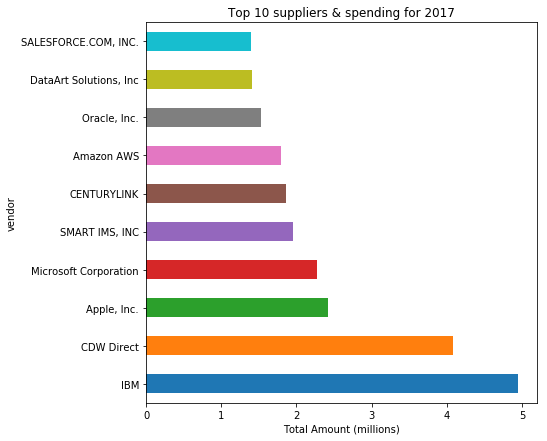

In [19]:
# Visualization by making bar graph on top 10 suppliers and total amount they spent on 2017.
top10_supplier_2017.plot.barh(figsize = (7, 7))
plt.xlabel('Total Amount (millions)')
plt.title('Top 10 suppliers spending for 2017');

## 2. Which business unit was the top spender so far in 2017?

In [20]:
# Group by 'buid'
buid_df = df.groupby(['buid'])
# Sum amount
sum_buid_df = buid_df['amount'].sum()
# Sort values decending order and convert numbers into currency ($) in millions.
top_buid_2017 = sum_buid_df.sort_values(ascending=False)[:10]/1000000

print('Top business unit spender:')
print('$'+top_buid_2017.round(2).astype(str) + "MM")


Top business unit spender:
buid
100    $116.56MM
110     $79.58MM
120      $13.7MM
200     $11.53MM
Name: amount, dtype: object


Top business unit spender (2015-2017):
name
Techtrades, Inc. (HQ)    $116.56MM
Techtrades LTD (UK)       $79.58MM
Techtrades NK (Japan)      $13.7MM
Zeus Banking, Inc.        $11.53MM
Name: amount, dtype: object


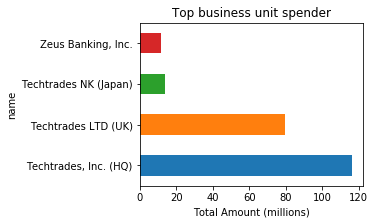

In [21]:
# Group by the name of the business unit and plot by the amount of each business unit have spent
print('Top business unit spender (2015-2017):')
print("$"+(df.groupby(['name'])['amount'].sum().sort_values(ascending=False)[:10]/1000000).round(2).astype(str)+'MM')
(df.groupby(['name'])['amount'].sum().sort_values(ascending=False)[:10]/1000000).plot.barh(figsize = (4, 3))
plt.xlabel('Total Amount (millions)')
plt.title('Top business unit spender');

## 3. Compare the top 10 suppliers in 2017 to the top suppliers in 2016

In [22]:
top10_2016_df = df.loc[df['vendor'].isin([
    'SALESFORCE.COM, INC.', 'DataArt Solutions, Inc', 'Oracle, Inc.', 'Amazon AWS', 'SMART IMS, INC', 
    'OFFICE DEPOT', 'Oxford Health Insurance, Inc', 'Apple, Inc.', 'CDW Direct', 'IBM'])]
top10_2016_df = top10_2016_df['2016']

top10_2017_df = df.loc[df['vendor'].isin([
    'SALESFORCE.COM, INC.', 'DataArt Solutions, Inc', 'Oracle, Inc.', 'Amazon AWS', 'SMART IMS, INC', 
    'CENTURYLINK', 'Microsoft Corporation', 'Apple, Inc.', 'CDW Direct', 'IBM'])]
top10_2017_df = top10_2017_df['2017']

print('Top 10 suppliers in 2016:')
print('Total transaction recorded:', len(top10_2016_df))
print('Total Amount:', f"${round(top10_2016_df.amount.sum()/1000000, 2)}MM")
print("$"+(df['2016'].groupby(['vendor'])['amount'].sum().sort_values(ascending=False)[:10]
           /1000000).round(2).astype(str)+'MM')

print('\n')
print('Top 10 suppliers in 2017:')
print('Total transaction recorded:', len(top10_2017_df))
print('Total Amount:', f"${round(top10_2017_df.amount.sum()/1000000, 2)}MM")
print("$"+(df['2017'].groupby(['vendor'])['amount'].sum().sort_values(ascending=False)[:10]
           /1000000).round(2).astype(str)+'MM')

Top 10 suppliers in 2016:
Total transaction recorded: 68221
Total Amount: $34.54MM
vendor
IBM                              $7.9MM
CDW Direct                      $5.18MM
Oracle, Inc.                    $3.89MM
SALESFORCE.COM, INC.            $3.73MM
Apple, Inc.                     $3.19MM
DataArt Solutions, Inc          $2.54MM
SMART IMS, INC                  $2.37MM
Amazon AWS                      $2.15MM
OFFICE DEPOT                    $1.87MM
Oxford Health Insurance, Inc    $1.73MM
Name: amount, dtype: object


Top 10 suppliers in 2017:
Total transaction recorded: 34548
Total Amount: $23.66MM
vendor
IBM                       $4.95MM
CDW Direct                $4.09MM
Apple, Inc.               $2.42MM
Microsoft Corporation     $2.27MM
SMART IMS, INC            $1.95MM
CENTURYLINK               $1.86MM
Amazon AWS                 $1.8MM
Oracle, Inc.              $1.53MM
DataArt Solutions, Inc    $1.41MM
SALESFORCE.COM, INC.       $1.4MM
Name: amount, dtype: object


### 2016 & 2017 Visualization

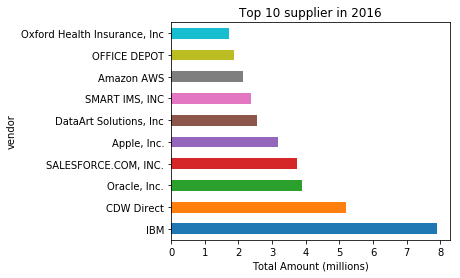

In [23]:
(df['2016'].groupby(['vendor'])['amount'].sum().sort_values(ascending=False)[:10]/1000000).plot.barh(figsize = (5, 4))
plt.xlabel('Total Amount (millions)')
plt.title('Top 10 supplier in 2016');

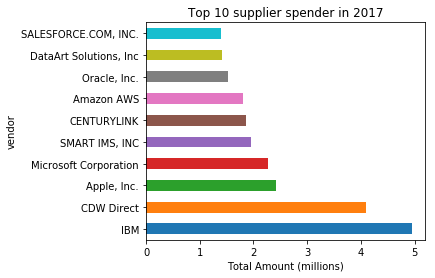

In [24]:
(df['2017'].groupby(['vendor'])['amount'].sum().sort_values(ascending=False)[:10]/1000000).plot.barh(figsize = (5, 4))
plt.xlabel('Total Amount (millions)')
plt.title('Top 10 supplier spender in 2017');

## 4. How many transactions were recorded for 2015, 2016, and 2017?

In [25]:
print('Total transaction in 2015:',len(df['2015']))
print('Total transaction in 2016:',len(df['2016']))
print('Total transaction in 2017:',len(df['2017']))

Total transaction in 2015: 401455
Total transaction in 2016: 350276
Total transaction in 2017: 211615
